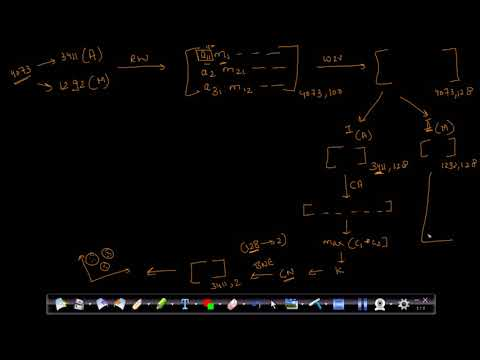

In [1]:
from IPython.display import IFrame, YouTubeVideo
YouTubeVideo(id='Ufe16ie-BPM', width=600)

In [1]:
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
# you need to have tensorflow 
from stellargraph.data import UniformRandomMetaPathWalk
from stellargraph import StellarGraph

1. Read Graph from the given movie_actor_network.csv note that the graph is bipartite graph
2. using stellergaph and gensim packages, get the dense representation(128dimensional vector) of every node in the graph
3. Apply Clustering Algorithm to group similar actors

	a. For this task consider only the actor nodes <br>
	b. Apply any clustering algorithm of your choice <br>
	c. Choose the number of clusters for which you have maximum score of <b>$Cost1*Cost2$</b><br>
	
    Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters <br><br>
<br>
    
	Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of actor nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(number of unique movie nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}$ where N= number of clusters 
    
	<pre>
	for number_of_clusters in [3, 5, 10, 30, 50, 100, 200, 500]:
		algo = clustering_algorith(clusters=number_of_clusters)
        # you will be passing a matrix of size N*d where N number of actor nodes and d is dimension from gensim
		algo.fit(the dense vectors of actor nodes) 
		computer the metric Cost = Cost1*Cost2
	return number_of_clusters which have maximum Cost
	</pre>

	d. Fit the clustering algorithm with the opimal number_of_clusters and get the cluster number for each node<br>
	e. Convert the d-dimensional dense vectors of nodes into 2-dimensional using dimensionality reduction techniques (preferably TSNE)<br>
	f. Plot the 2d scatter plot, with the node vectors after step e and give colors to nodes such that same cluster nodes will have same color


4. Apply Clustering Algorithm to group similar movies

	a. for this task consider only the movie nodes
  
	b. apply any clustering algorithm of your choice
  
	c. choose the number of clusters for which you have maximum score of $Cost1*Cost2$ <br>

    Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the movie nodes and its actor neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters <br><br>
	
	Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of movie nodes in the graph with the movie nodes and its actor neighbours in cluster i)}}{\text{(number of unique actor nodes in the graph with the movie nodes and its actor neighbours in cluster i)}}$ where N= number of clusters 

	<pre>
	for number_of_clusters in [3, 5, 10, 30, 50, 100, 200, 500]:
		algo = clustering_algorith(clusters=number_of_clusters)
        # you will be passing a matrix of size N*d where N number of actor nodes and d is dimension from gensim
		algo.fit(the dense vectors of actor nodes) 
		computer the metric Cost = Cost1*Cost2
	return number_of_clusters which have maximum Cost
	</pre>

	d. Fit the clustering algorithm with the opimal number_of_clusters and get the cluster number for each node <br>
	e. Convert the d-dimensional dense vectors of nodes into 2-dimensional using dimensionality reduction techniques (preferably TSNE)<br>
	f. Plot the 2d scatter plot, with the node vectors after step e and give colors to nodes such that same cluster nodes will have same color
	


<img src='https://i.imgur.com/4SPYPFa.jpg'>

### these links and function might be usefull while solving this assignment
1. what is bipartite graph: https://en.wikipedia.org/wiki/Bipartite_graph
2. Ego graph: https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.ego.ego_graph.html
3. Combining two are more graphs: https://stackoverflow.com/a/32652764/4084039
    ex: if you want to merge three graphs which are mentiond in the above image, you can write like this
    <pre>
    U=nx.Graph()
    for i in number of clusters:
        if U is empty:
            U.add_edges_from(ith Cluster's graph.edges(data=True))
            U.add_nodes_from(ith Cluster's graph.nodes(data=True)) 
        else:
            U.add_edges_from(ith Cluster's graph.edges(data=True)+U.edges(data=True))
            U.add_nodes_from(ith Cluster's graph.nodes(data=True)+U.nodes(data=True))
    </pre>
4. connected components:  https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.components.connected_components.html
5. Degree of a node: https://networkx.github.io/documentation/stable/reference/classes/generated/networkx.Graph.degree.html
6. Neighbors of node: https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.Graph.neighbors.html

In [2]:
# hint: you can refer facebook case study notebook to solve this assignment in couple of hours
data=pd.read_csv('movie_actor_network.csv', index_col=False, names=['movie','actor'])

In [3]:
edges = [tuple(x) for x in data.values.tolist()]

In [4]:
B = nx.Graph()
B.add_nodes_from(data['movie'].unique(), bipartite=0, label='movie')
B.add_nodes_from(data['actor'].unique(), bipartite=1, label='actor')
B.add_edges_from(edges, label='acted')

In [5]:
print("number of nodes", B.number_of_nodes())
print("number of edges", B.number_of_edges())

number of nodes 4703
number of edges 9650


In [6]:
movies = []
actors = []
for i in B.nodes():
    if 'm' in i:
        movies.append(i)
    if 'a' in i:
        actors.append(i)
print('number of movies ', len(movies))
print('number of actors ', len(actors))

number of movies  1292
number of actors  3411


In [7]:

# Create the random walker
rw = UniformRandomMetaPathWalk(StellarGraph(B))

# specify the metapath schemas as a list of lists of node types.
metapaths = [["actor", "movie", "actor"] , ["movie" , 'actor' , 'movie']]

walks = rw.run(nodes=list(B.nodes()), # root nodes
               length=100,  # maximum length of a random walk
               n=1,        # number of random walks per root node 
               metapaths=metapaths
              )

print("Number of random walks: {}".format(len(walks)))

Number of random walks: 4703


In [9]:
from gensim.models import Word2Vec
model = Word2Vec(walks, size=128, window=5)

In [10]:
model.wv.vectors.shape# 128-dimensional vector for each node in the graph

(4703, 128)

In [12]:
#Retrieve node embeddings and corresponding subjects
node_ids = model.wv.index2word  # list of node IDs
node_embeddings = model.wv.vectors  # numpy.ndarray of size number of nodes times embeddings dimensionality
node_embeddings_actors = []
node_ids_actors = []
for i in range(len(node_embeddings)):
    if 'a' in node_ids[i]:
        node_embeddings_actors.append(node_embeddings[i])
        node_ids_actors.append(node_ids[i])

#node_targets = [ A.node[node_id]['label'] for node_id in node_ids]  

In [13]:
def cost_1(node_ids , y , k):
    dict_data = {'nodes':node_ids , 'y':y}
    frame = pd.DataFrame(dict_data , columns = ['nodes' , 'y'])
    end_sum = 0
    for i in range(0,k):
        sum=0
        temp_movies = []
        tot_nodes = []
        temp_nodes = frame[frame.y == i].nodes
        if len(temp_nodes) == 0:
            continue
        tot_nodes.extend(temp_nodes)
        edges = []
        for j in temp_nodes:
            temp_movies.extend(B.neighbors(j))
            tot_nodes.extend(B.neighbors(j))
            edges.extend([(j,m) for m in B.neighbors(j)])
        len_tot_nodes = len(set(tot_nodes))
        A = nx.Graph()
        A.add_nodes_from(temp_movies, bipartite=0, label='movie')
        A.add_nodes_from(temp_nodes, bipartite=1, label='actor')
        A.add_edges_from(edges, label='acted')
        
        
        largest_cc = len(set(max(nx.connected_components(A), key=len))) # line copied from https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.components.connected_components.html#networkx.algorithms.components.connected_components
        
        
        end_sum += largest_cc/len_tot_nodes
    end_sum /= k
    return end_sum


def cost_2(node_ids , y , k):
    dict_data = {'nodes':node_ids , 'y':y}
    frame = pd.DataFrame(dict_data , columns = ['nodes' , 'y'])
    end_sum = 0
    for i in range(0,k):
        sum=0
        tot_mov = []
        temp_nodes = frame[frame.y == i].nodes
        if len(temp_nodes) == 0:
            continue;
        temp_nodes = list(temp_nodes)
        for j in list(B.degree(temp_nodes)):
            sum+=j[1]
        
        for j in temp_nodes:
            tot_mov.extend(B.neighbors(j))
        len_tot_mov = len(set(tot_mov))
        end_sum+=(sum/len_tot_mov)
    end_sum/=k
    return end_sum

from sklearn.cluster import KMeans

for k in [3, 10, 30, 50, 100, 200, 500]:
    model = KMeans(n_clusters=k , init='k-means++')
    model.fit(node_embeddings)
    cl_numbers = model.predict(node_embeddings_actors)
    cost1 = cost_1(node_ids_actors , cl_numbers , k)
    cost2 = cost_2(node_ids_actors , cl_numbers , k)
    cost = cost1*cost2
    print(k , " - " , cost)

3  -  3.6537215017352467
10  -  2.075619059732386
30  -  1.479932463784923
50  -  1.0942101410098306
100  -  0.7475001339613347
200  -  0.5007858652831263
500  -  0.33595574251880356


In [14]:
model = KMeans(n_clusters = 3)
model.fit(node_embeddings)
cl_number = model.predict(node_embeddings)
from sklearn.manifold import TSNE
transform = TSNE #PCA

trans = transform(n_components=2)
node_embeddings_2d = trans.fit_transform(node_embeddings)

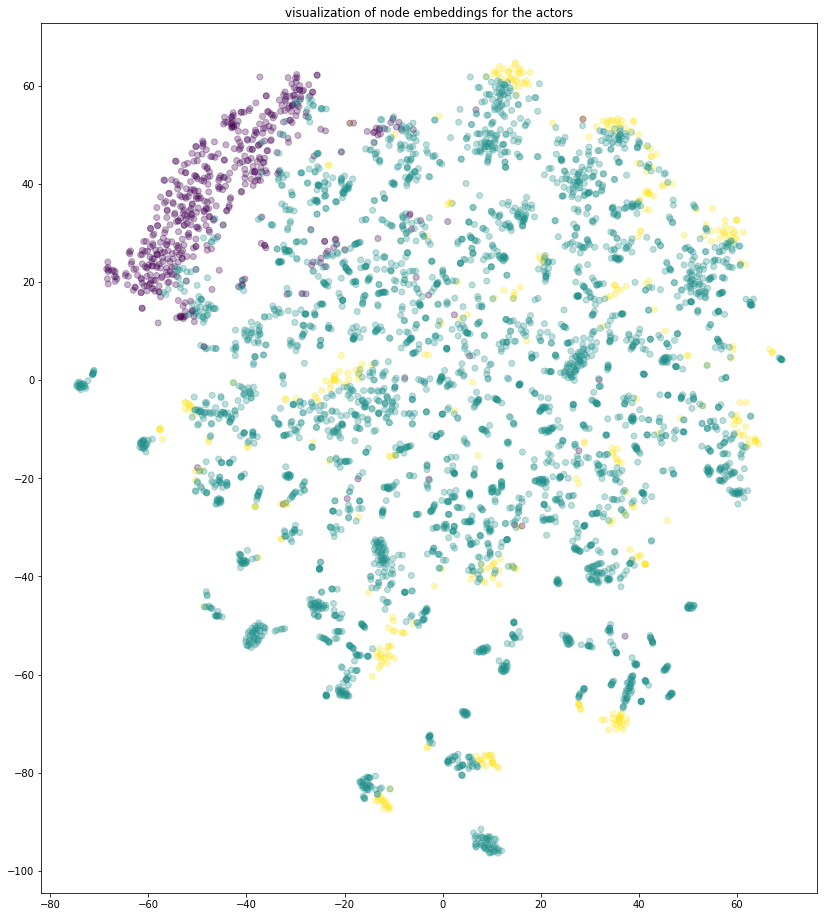

In [15]:
import numpy as np
# draw the points
plt.figure(figsize=(20,16))
plt.axes().set(aspect="equal")
plt.scatter(node_embeddings_2d[:,0], node_embeddings_2d[:,1], c=cl_number, alpha=0.3)
plt.title('visualization of node embeddings for the actors')
plt.show()

### Task 2

In [16]:
from gensim.models import Word2Vec
model = Word2Vec(walks, size=128, window=5)

In [17]:
model.wv.vectors.shape  # 128-dimensional vector for each node in the graph

(4703, 128)

In [18]:
#Retrieve node embeddings and corresponding subjects
node_ids = model.wv.index2word  # list of node IDs
node_embeddings = model.wv.vectors  # numpy.ndarray of size number of nodes times embeddings dimensionality
node_embeddings_movies = []
node_ids_movies = []
for i in range(len(node_embeddings)):
    if 'm' in node_ids[i]:
        node_embeddings_movies.append(node_embeddings[i])
        node_ids_movies.append(node_ids[i])

#node_targets = [ A.node[node_id]['label'] for node_id in node_ids]  

In [22]:
def cost_1(node_ids , y , k):
    dict_data = {'nodes':node_ids , 'y':y}
    frame = pd.DataFrame(dict_data , columns = ['nodes' , 'y'])
    end_sum = 0
    for i in range(0,k):
        sum=0
        temp_actors = []
        tot_nodes = []
        temp_nodes = frame[frame.y == i].nodes
        if len(temp_nodes) == 0:
            continue
        tot_nodes.extend(temp_nodes)
        edges = []
        for j in temp_nodes:
            temp_actors.extend(B.neighbors(j))
            tot_nodes.extend(B.neighbors(j))
            edges.extend([(j,m) for m in B.neighbors(j)])
        len_tot_nodes = len(set(tot_nodes))
        A = nx.Graph()
        A.add_nodes_from(temp_actors, bipartite=0, label='movie')
        A.add_nodes_from(temp_nodes, bipartite=1, label='actor')
        A.add_edges_from(edges, label='acted')
        
        
        largest_cc = len(set(max(nx.connected_components(A), key=len))) # line copied from https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.components.connected_components.html#networkx.algorithms.components.connected_components
        
        
        end_sum += largest_cc/len_tot_nodes
    end_sum /= k
    return end_sum


def cost_2(node_ids , y , k):
    dict_data = {'nodes':node_ids , 'y':y}
    frame = pd.DataFrame(dict_data , columns = ['nodes' , 'y'])
    end_sum = 0
    for i in range(0,k):
        sum=0
        tot_actors = []
        temp_nodes = frame[frame.y == i].nodes
        if len(temp_nodes) == 0:
            continue;
        temp_nodes = list(temp_nodes)
        for j in list(B.degree(temp_nodes)):
            sum+=j[1]
        
        for j in temp_nodes:
            tot_actors.extend(B.neighbors(j))
        len_tot_actors = len(set(tot_actors))
        end_sum+=(sum/len_tot_actors)
    end_sum/=k
    return end_sum

from sklearn.cluster import KMeans

for k in [3, 10, 30, 50, 100, 200, 500]:
    model = KMeans(n_clusters=k , init='k-means++')
    model.fit(node_embeddings)
    cl_numbers = model.predict(node_embeddings_movies)
    cost1 = cost_1(node_ids_movies , cl_numbers , k)
    cost2 = cost_2(node_ids_movies , cl_numbers , k)
    cost = cost1*cost2
    print(k , " - " , cost)

3  -  3.3567571606713704
10  -  2.059709822615616
30  -  1.7989627347140693
50  -  1.631554397275268
100  -  1.3576191660253034
200  -  1.0921784109560884
500  -  0.836314784779819


In [23]:
model = KMeans(n_clusters = 3)
model.fit(node_embeddings)
cl_number = model.predict(node_embeddings)
from sklearn.manifold import TSNE
transform = TSNE #PCA

trans = transform(n_components=2)
node_embeddings_2d = trans.fit_transform(node_embeddings)

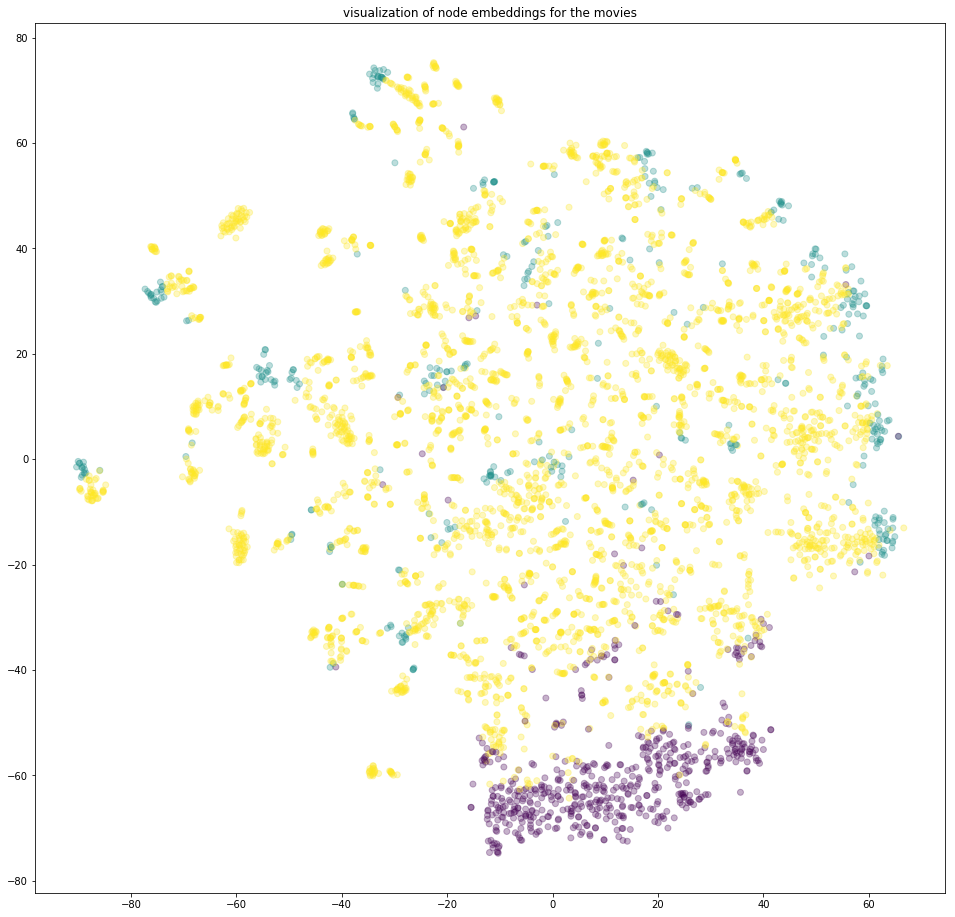

In [24]:
import numpy as np
# draw the points
plt.figure(figsize=(20,16))
plt.axes().set(aspect="equal")
plt.scatter(node_embeddings_2d[:,0], node_embeddings_2d[:,1], c=cl_number, alpha=0.3)
plt.title('visualization of node embeddings for the movies')
plt.show()